# Diabetic Dataset Analysis using Machine learning algorithms

# Introduction

- Diabetes is an illness caused because of high glucose level in a human body.

- Diabetes should not be ignored if it is untreated then Diabetes may cause some major issues in a person like 
  heart related problems, kidney problem, blood pressure, eye damage and it can also affects other organs of human body.
  
- Diabetes can be controlled if it is predicted earlier. To achieve this goal in this project work 
  we will do early prediction of Diabetes in a human body for a higher accuracy  applying 
  Various Machine Learning Techniques. Machine learning techniques provide better result for prediction by
  constructing models from datasets collected from patients

## Name of the features with their meanings

1.Pregnancies: Number of times pregnant

2.Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

3.Blood Pressure: Diastolic blood pressure (mm Hg)

4.Skin Thickness: Triceps skin fold thickness (mm)

5.Insulin: 2-Hour serum insulin (mu U/ml)

6.BMI: Body mass index (weight in kg/(height in m)^2)

7.Diabetes Pedigree Function: Diabetes pedigree function

8.Age: Age (years)

9.Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

## Importing required Libraries

In [21]:
import pandas as pd                 # for data analysis
import numpy as np                  # linear algebra and mathematical computation
import matplotlib.pyplot as plt     # for data visualization
%matplotlib inline
import seaborn as sns               # for data visualization


In [22]:
# Reading the dataset
diabetes_df=pd.read_csv("C:\\Users\\USER\\Desktop\\diabetes.csv",encoding='latin1')


In [4]:
# to observe the dataset
diabetes_df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)

In [5]:
# To replace if any of the column name contains space 
diabetes_df.columns = diabetes_df.columns.to_series().apply(lambda x: x.strip())
# to display all the column attributes
diabetes_df.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# to get information such as no of records ,missing values, datatype,no of columns
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# to get statistical summary for all numeric columns
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- From the above we can see there are no missing values but its is not true missing values in this dataset are given as 0
- so we need to replace all 0 with Nan values


In [9]:
diabetes_df1 = diabetes_df.copy(deep = True)
diabetes_df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df1.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Data Visualization

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

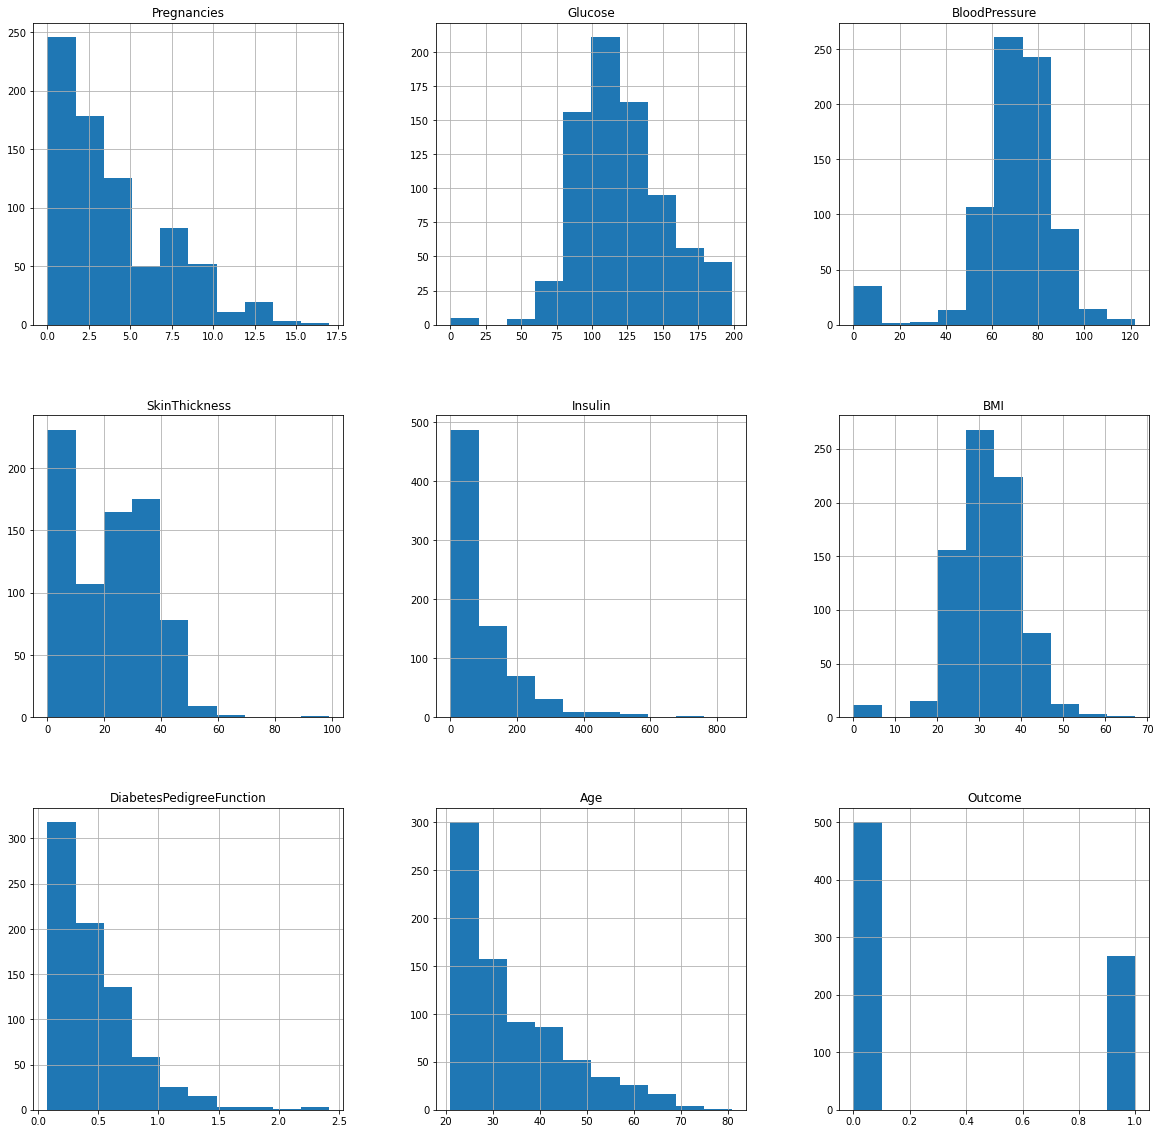

In [10]:
# plotting distribution plots before replacing null values
p=diabetes_df.hist(figsize=(20,20))
p

### Imputing all the null values with mean of the particular column

In [24]:
# Filling Nan values with mean values
diabetes_df1['Glucose'].fillna(diabetes_df1['Glucose'].mean(), inplace = True)
diabetes_df1['BloodPressure'].fillna(diabetes_df1['BloodPressure'].mean(), inplace = True)
diabetes_df1['SkinThickness'].fillna(diabetes_df1['SkinThickness'].mean(), inplace = True)
diabetes_df1['Insulin'].fillna(diabetes_df1['Insulin'].mean(), inplace = True)
diabetes_df1['BMI'].fillna(diabetes_df1['BMI'].mean(), inplace = True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

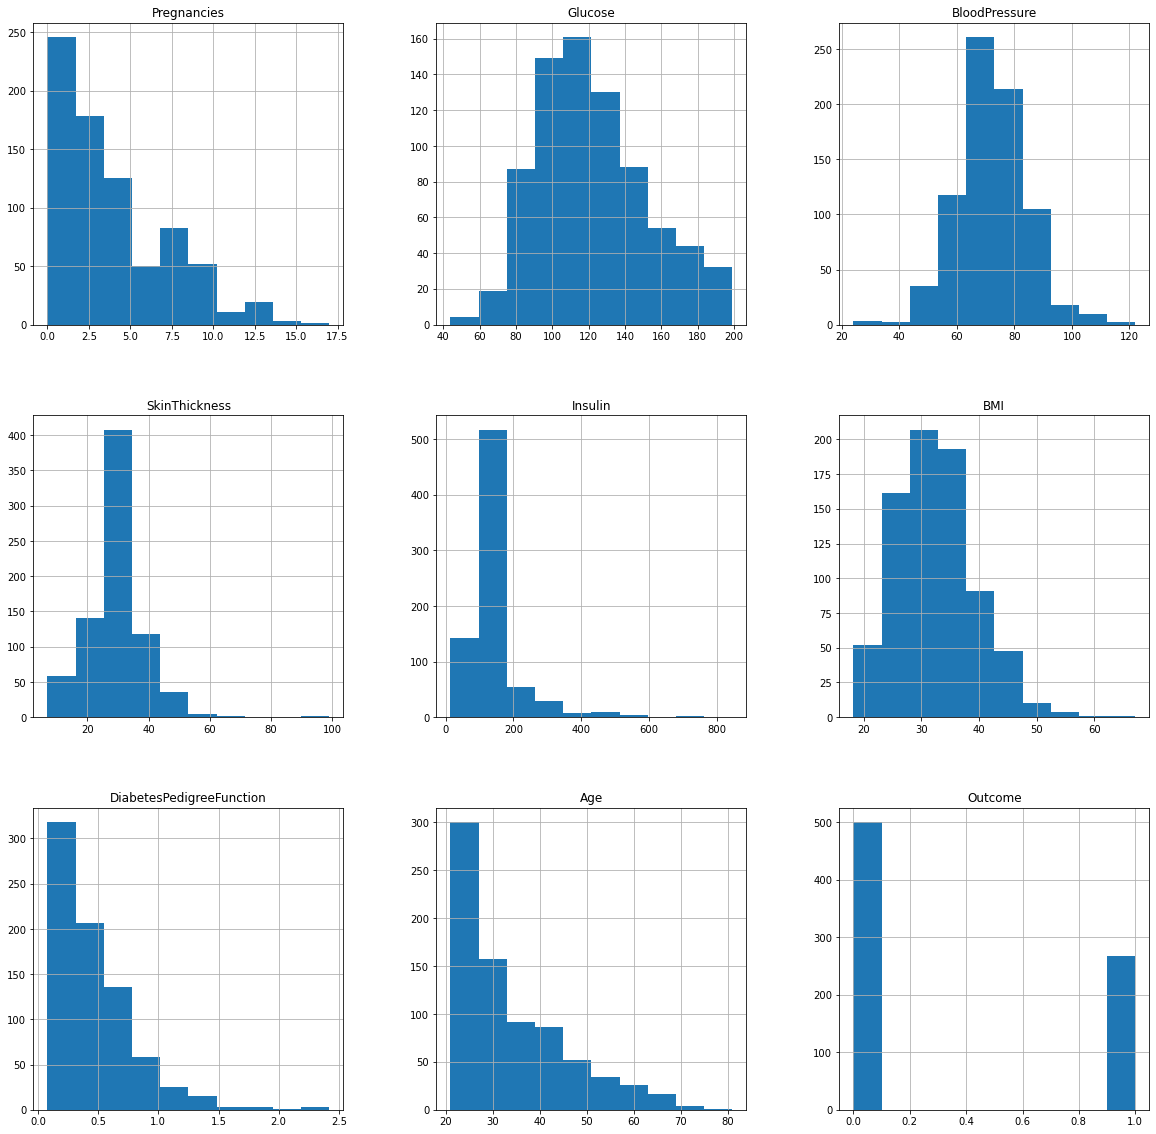

In [25]:
# plotting distribution plots after replacing null values
p=diabetes_df1.hist(figsize=(20,20))
p

- After filling nan values  we can observe that there is an noticeable variation in distribution of data

## Plotting null count analysis plot

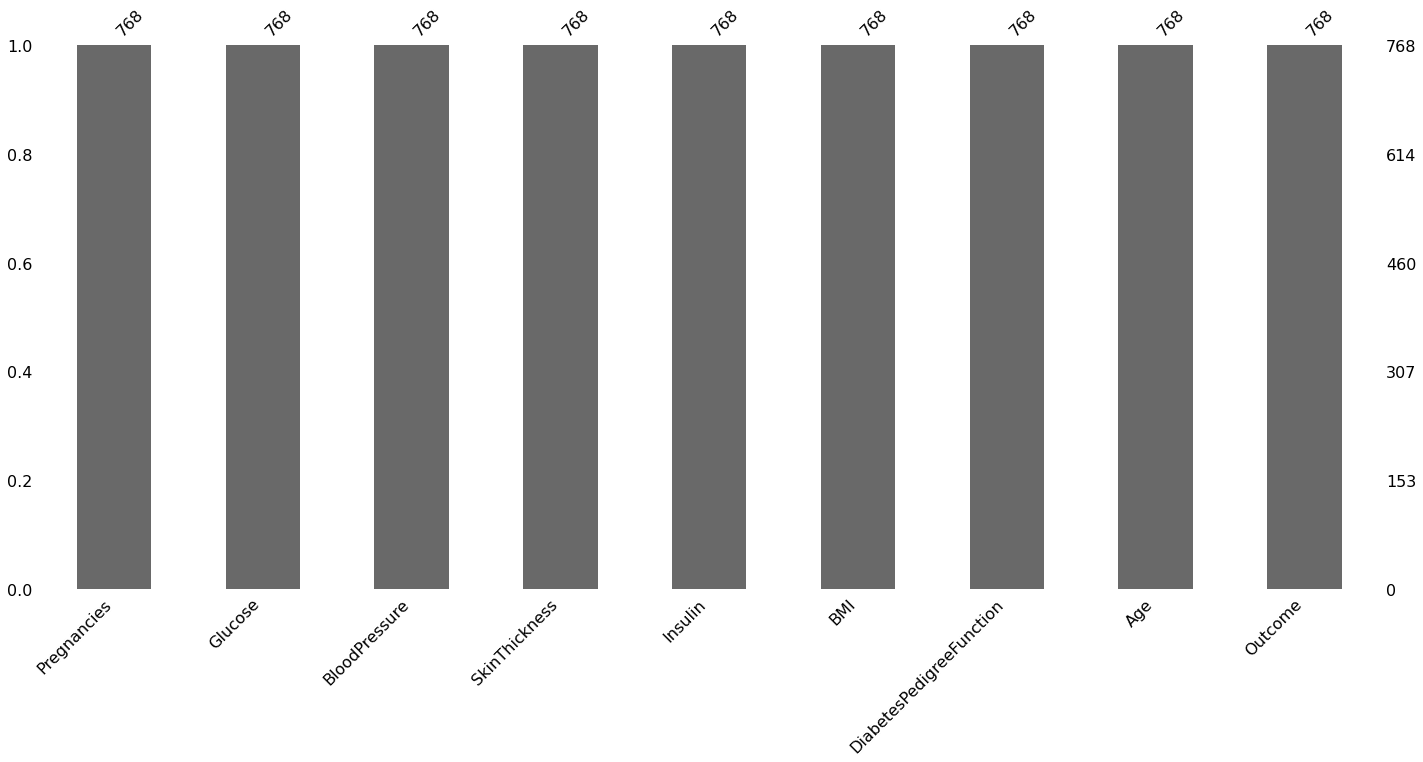

In [26]:
import missingno as msno
p=msno.bar(diabetes_df1)

- From this plot we can see there are no missing values in the dataset

0    500
1    268
Name: Outcome, dtype: int64


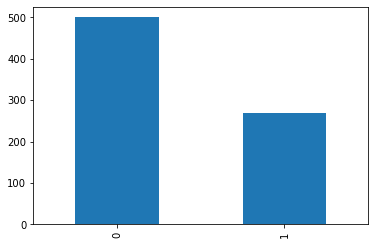

In [27]:
# checking whether the outcome variable data is balanced or not
print(diabetes_df1.Outcome.value_counts())
p=diabetes_df1.Outcome.value_counts().plot(kind="bar")

- No of patients who are non diabetic is half of them who are diabetic but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance

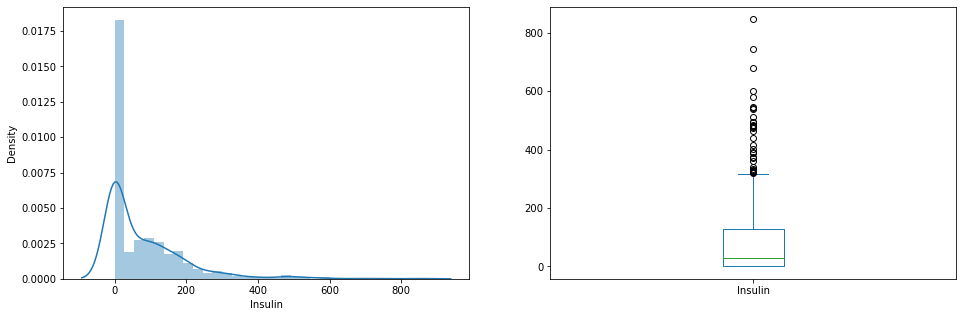

In [28]:
# checking for outliers in the Insulin variable
import warnings
warnings.filterwarnings('ignore')
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122),diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

- From distplot we can see the distribution of data which is right skewed and from boxplot we can notice that there are outliers in the insulin variable

## Correlation between all the feature before cleaning

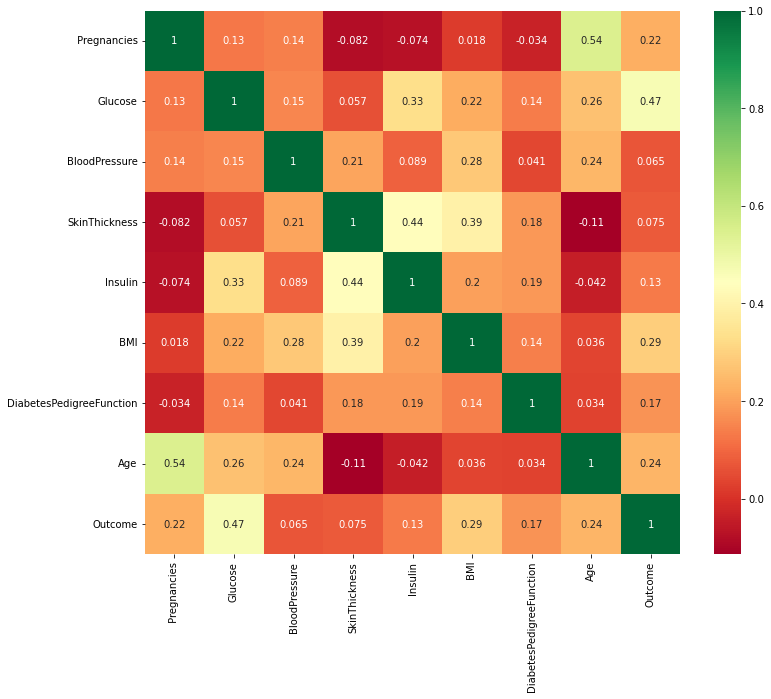

In [29]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

- From the heatmap we can observe that glucose,BMI,age,Pregnancies have positive correlation with outcome variable

# Scaling the Data
### Before scaling down the data let’s have a look into it

In [30]:
diabetes_df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [31]:
# Converting all the variables to same scale except outcome 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df1.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


- now we observe all the variables are in same scale which will be helpful for ML model to give better result

In [32]:
y=diabetes_df1.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building

In [33]:
# splitting the dataset
X = diabetes_df1.drop('Outcome', axis=1)
y = diabetes_df1['Outcome']

In [54]:
# Now splitting the data into training and testing data using train_test_split function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                    random_state=7)

In [112]:
# for checking how the data is split into train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


# Random Forest


In [96]:
# Building the model using random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators =40, random_state = 0)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40, random_state=0)

In [97]:
# checking accuracy score for random forest
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7708333333333334


### Classification report and confussion matrix of random forest model

In [98]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[107  15]
 [ 29  41]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.73      0.59      0.65        70

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



# Building model using Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
# getting accuracy score for decision tree
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy Score = 0.78125


### Classification report and confussion matrix of decision tree model

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[105  17]
 [ 25  45]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       122
           1       0.73      0.64      0.68        70

    accuracy                           0.78       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.78      0.78       192



# Building model using Logistic regression

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [103]:
# getting accuracy score for Logistic regression
from sklearn import metrics

predictions =lr.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.78125


In [104]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[113   9]
 [ 33  37]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       122
           1       0.80      0.53      0.64        70

    accuracy                           0.78       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.79      0.78      0.77       192



# Building model using Naive-Bayes Classifier

In [105]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [106]:
# getting accuracy score for Naive-Bayes Classifier
from sklearn import metrics

predictions =nb.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7447916666666666


In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[97 25]
 [24 46]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       122
           1       0.65      0.66      0.65        70

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192



# Building model using Support Vector Machine


In [108]:
from sklearn.svm import SVC
sv=SVC(kernel = 'linear', random_state = 0)
sv.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [109]:
# getting accuracy score for Naive-Bayes Classifier
from sklearn import metrics

predictions =sv.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7708333333333334


In [110]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[110  12]
 [ 32  38]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       122
           1       0.76      0.54      0.63        70

    accuracy                           0.77       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



There are four ways to check if the predictions are right or wrong from confusion matrix:

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative--->Type-2 error--->This is a critical scenario

FP / False Positive: the case was negative but predicted positive--->Type-1 error

so our aim is to lower both type-1 and 2 error values for better perforance of the model

Precision — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.



Conclusion:

    Accuracy Scores for above models
    1.For Random forest-->77%
    2.For Decision Tree-->78%
    3.For Logistic Regression-->78%
    4.For Naive-Bayes Classifier-->74%
    5.For Support Vector machine-->77%
    
--> Both Decision Tree and Logistic regression has given same accuracy we can use any of the model for prediction   
    

## Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [114]:
# getting the feature importances
dtree.feature_importances_

array([0.05076591, 0.27266878, 0.10885497, 0.06694044, 0.08643251,
       0.18499416, 0.13783821, 0.09150502])

<AxesSubplot:>

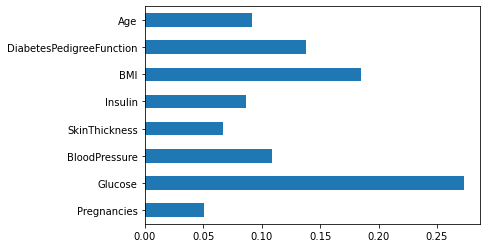

In [115]:
# visual represntation
(pd.Series(dtree.feature_importances_, index=X.columns).plot(kind='barh'))

- Here from the above graph, it is clearly visible that Glucose is the most important feature in this dataset.